Описание в: 'doc/w2_06_statement-metric-tuning.pdf'

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import scale

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def save_answer(name, value):
    with open('data/statement-metric-tuning_' + name + '.txt', 'w', encoding='utf-8') as f:
        f.write(value)

In [3]:
X = scale(load_boston().data)
y = load_boston().target

In [4]:
cv = KFold(5, shuffle = True, random_state = 42)

In [5]:
mean_squared_error_list = []
for p in np.linspace(1, 10, 200):
    score = cross_val_score(KNeighborsRegressor(n_neighbors=5, weights='distance', p=p),
                            X, y, cv=cv, scoring='neg_mean_squared_error').mean()
    mean_squared_error_list.append(score)

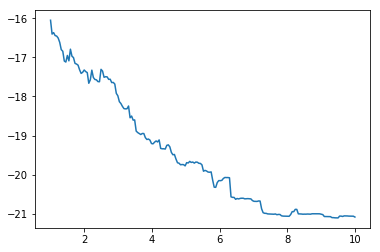

In [6]:
plt.plot(np.linspace(1, 10, 200), mean_squared_error_list)

In [7]:
answer = max([(value, k) for k, value in zip(np.linspace(1, 10, 200), mean_squared_error_list)])[1]
save_answer('1', str(answer))

answer

1.0